|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [1]:
import pandas as pd 
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")

# Q2: Read instagram_users.csv file

In [2]:
df = pd.read_csv('instagram_users.csv')

In [3]:
df.head()

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi,class
0,44,48,325,33,1,0,12,0.0,0.0,0.00,0.00,0.000,0.0,0.0,0.000,0.111111,0.094985,f
1,10,66,321,150,1,0,213,0.0,1.0,14.39,1.97,0.000,1.5,0.0,0.000,0.206826,230.412857,f
2,33,970,308,101,1,1,436,0.0,1.0,10.10,0.30,0.000,2.5,0.0,0.056,0.572174,43.569939,f
3,70,86,360,14,1,0,0,1.0,0.0,0.78,0.06,0.000,0.0,0.0,0.000,1.000000,5.859799,f
4,3,21,285,73,1,0,93,0.0,0.0,14.29,0.00,0.667,0.0,0.0,0.000,0.300494,0.126019,f


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65326 entries, 0 to 65325
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pos     65326 non-null  int64  
 1   flw     65326 non-null  int64  
 2   flg     65326 non-null  int64  
 3   bl      65326 non-null  int64  
 4   pic     65326 non-null  int64  
 5   lin     65326 non-null  int64  
 6   cl      65326 non-null  int64  
 7   cz      65326 non-null  float64
 8   ni      65326 non-null  float64
 9   erl     65326 non-null  float64
 10  erc     65326 non-null  float64
 11  lt      65326 non-null  float64
 12  hc      65326 non-null  float64
 13  pr      65326 non-null  float64
 14  fo      65326 non-null  float64
 15  cs      65326 non-null  float64
 16  pi      65326 non-null  float64
 17  class   65326 non-null  object 
dtypes: float64(10), int64(7), object(1)
memory usage: 9.0+ MB


# Q3: Split tha dataset into training and testing

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = df.drop('class', axis=1)
y = df['class']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

### Decision Tree Model

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix

In [9]:
#Build the model 
dtree = DecisionTreeClassifier()

In [10]:
#Training the model 
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [11]:
#Eavaluating the model 
prediction = dtree.predict(x_test)

In [12]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           f       0.85      0.86      0.86      9809
           r       0.86      0.85      0.85      9789

    accuracy                           0.86     19598
   macro avg       0.86      0.86      0.86     19598
weighted avg       0.86      0.86      0.86     19598



In [13]:
print(accuracy_score(y_test, prediction))

0.8560567404837228


In [14]:
print(confusion_matrix(y_test, prediction))

[[8460 1349]
 [1472 8317]]


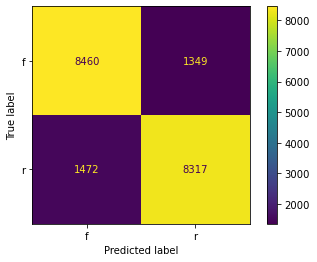

In [15]:
plot_confusion_matrix(dtree, x_test, y_test);

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

### Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
#Build the model 
rfc = RandomForestClassifier(n_estimators=100)

In [18]:
#Training the model 
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [19]:
#Eavaluating the model 
rfc_prediction = rfc.predict(x_test)

In [20]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           f       0.85      0.86      0.86      9809
           r       0.86      0.85      0.85      9789

    accuracy                           0.86     19598
   macro avg       0.86      0.86      0.86     19598
weighted avg       0.86      0.86      0.86     19598



In [21]:
print(accuracy_score(y_test, prediction))

0.8560567404837228


In [22]:
print(confusion_matrix(y_test, prediction))

[[8460 1349]
 [1472 8317]]


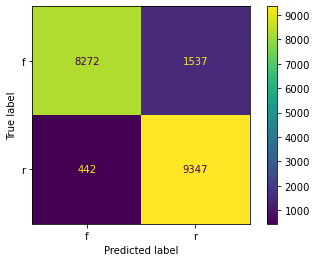

In [23]:
plot_confusion_matrix(rfc, x_test, y_test);